# Project: Featurization, Model Selection and Tuning
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

🥏Data Description:

    The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was
    determined from laboratory. Data is in raw form (not scaled).The data has 8 quantitative input 
    variables, and 1 quantitative output variable, and 1030 instances (observations).

🥏Domain:

    Material manufacturing

🥏Context:

    Concrete is the most important material in civil engineering. The concrete compressive strength is
    a highly nonlinear function of age and ingredients.
    These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate,
    and fine aggregate.

🥏Attribute Information:

    ● Cement : measured in kg in a m3 mixture
    ● Blast : measured in kg in a m3 mixture
    ● Fly ash : measured in kg in a m3 mixture
    ● Water : measured in kg in a m3 mixture
    ● Superplasticizer : measured in kg in a m3 mixture
    ● Coarse Aggregate : measured in kg in a m3 mixture
    ● Fine Aggregate : measured in kg in a m3 mixture
    ● Age : day (1~365)
    ● Concrete compressive strength : measured in MPa

🥏Learning Outcomes:
    
    ● Exploratory Data Analysis
    ● Building ML models for regression 
    ● Hyper parameter tuning

🥏Objective:
    
    Modeling of strength of high performance concrete using Machine Learning

🥏Steps and tasks:

    Deliverable 1. (Exploratory data quality report reflecting the following) 
        a. Univariateanalysis
            i. Univariate  analysis–data types and description of the independent attributes which should 
            include (name, meaning, range of values observed, central values (mean and median), standard 
            deviation and quartiles, analysis of the body of distributions/tails, missing values,outliers
        b. Multivariate analysis
            i. Bi-variate analysis between the predictor variables and between the predictor variables and
            target column. Comment on your findings in terms of their relationship and degree of relation
            if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, 
            histograms or density curves. Select the most appropriate attributes
        c. Strategies to address the different data challenges such as data pollution, outliers and missing
        values.
        
    Deliverable 2. (Feature Engineering techniques)
        a. Identify opportunities(if any) to  create a composite feature, drop a feature.
        b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or 
        would a quadratic or higher degree help.
        c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters 
        and present your findings in terms of  the independent attributes and their suitability to predict
        strength.
        
    Deliverable 3. (create the model )
        a. Obtain feature importance for the individual features using multiple methods and present your
        findings.
        
    Deliverable 4. (Tuning the model)
        a. Algorithms that you think will be suitable for this project.
        b. Techniques employed to squeeze that extra performance out of the model without making it overfit
        or underfit
        c. Model performance range at 95% confidence level.

# Import the necessary libraries

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

# To enable plotting graph in jupyter notebook
%matplotlib inline

In [ ]:
# for arrays and matrices
import numpy as np

# for importing data and data analysis
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression model
from sklearn.linear_model import LinearRegression

# Polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

from sklearn import tree

# For calculating accuracy measures and confusion matrix
from sklearn import metrics

from os import system
from IPython.display import Image  

from sklearn.utils import resample

# For Decision Tree Regression model building
from sklearn.tree import DecisionTreeRegressor

# for Support Vector Regression model building
from sklearn.svm import SVR

# For Random Forest model building
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import KMeans

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

# for scaling
from sklearn.preprocessing import StandardScaler 

# for PCA/feature extraction
from sklearn.decomposition import PCA

#### Visual inspection of data by opening csv file. Below are obserbations - 

1. 'cement' column: It's Kgs of cement per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No zero or blank or NA values. | ii. It ranges from 102 to 540.

2. 'slag' column: It's Kgs of slag per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No blank or NA values. | iii. Few 0's - lets assume o is a valid value. |
        iv. Its non-zero values ranges from 11 to 359.4.

3. 'ash' column: It's Kgs of ash per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No blank or NA values. | iii. Few 0's - lets assume o is a valid value. |
        iv. Its non-zero values ranges from 24.5 to 200.1.

4. 'water' column: It's Kgs of water per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No zero or blank or NA values. | iii. It ranges from 121.8 to 247.

5. 'superplastic' column: It's Kgs of 'superplastic'per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No blank or NA values. | iii. Few 0's - lets assume o is a valid value. |
        iv. Its non-zero values ranges from 1.7 to 32.2.

6. 'coarseagg' column: It's Kgs of 'coarseagg'per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No zero or blank or NA values. | iii. It ranges from 801 to 1145.

7. 'fineagg' column: It's Kgs of 'fineagg'per cubic-meter of concrete mixture.
        i. No non-numeric values. | ii. No zero or blank or NA values. | iii. It  ranges from 594 to 992.6.

8. 'age' column: It's age of the concrete in days.
        i. No non-numeric values. | ii. No zero or blank or NA values. | iii. It ranges from 1 to 365.

9. 'strength' column: It's complehensive strength of the concrete in MPa.
        i. No non-numeric values. | ii. No zero or blank or NA values. | iii. It ranges from 2.33 to 82.6.

# Read the data as a data frame

In [ ]:
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Deliverable 1. (Exploratory data quality report) 
    a. Univariate analysis
        i. Univariate  analysis–data types and description of the independent attributes which should 
        include (name, meaning, range of values observed, central values (mean and median), standard 
        deviation and quartiles, analysis of the body of distributions/tails, missing values,outliers
    b. Multivariate analysis
        i. Bi-variate analysis between the predictor variables and between the predictor variables and
        target column. Comment on your findings in terms of their relationship and degree of relation
        if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, 
        histograms or density curves. Select the most appropriate attributes
    c. Strategies to address the different data challenges such as data pollution, outliers and missing
    values.

### 1. a. Univariate Analysis

#### Five point summary

In [ ]:
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##### Data type of each attribute

In [ ]:
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Size of dataframe and column names 

In [ ]:
print('There are %s rows and %s columns in the dataset.' %(concrete_df.shape[0], concrete_df.shape[1]))

print('\nBelow are the dataset columns:')
for i, item in enumerate(concrete_df.columns,1):
    print(i, '. ' + item, sep='',end='\n')

There are 1030 rows and 9 columns in the dataset.

Below are the dataset columns:
1. cement
2. slag
3. ash
4. water
5. superplastic
6. coarseagg
7. fineagg
8. age
9. strength


The dataset has 8 attributes ['strength' being target variable] and there are 1030 observations.

#### Checking the presence of missing values 

In [ ]:
print('Number of Missing Values by Attributes:\n')
print(concrete_df.isnull().sum())

Number of Missing Values by Attributes:

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64


There are no missing values in dataset.

#### Checking the presence of outliers
Lets do boxplot and distplot side by side to analyze for outliers.


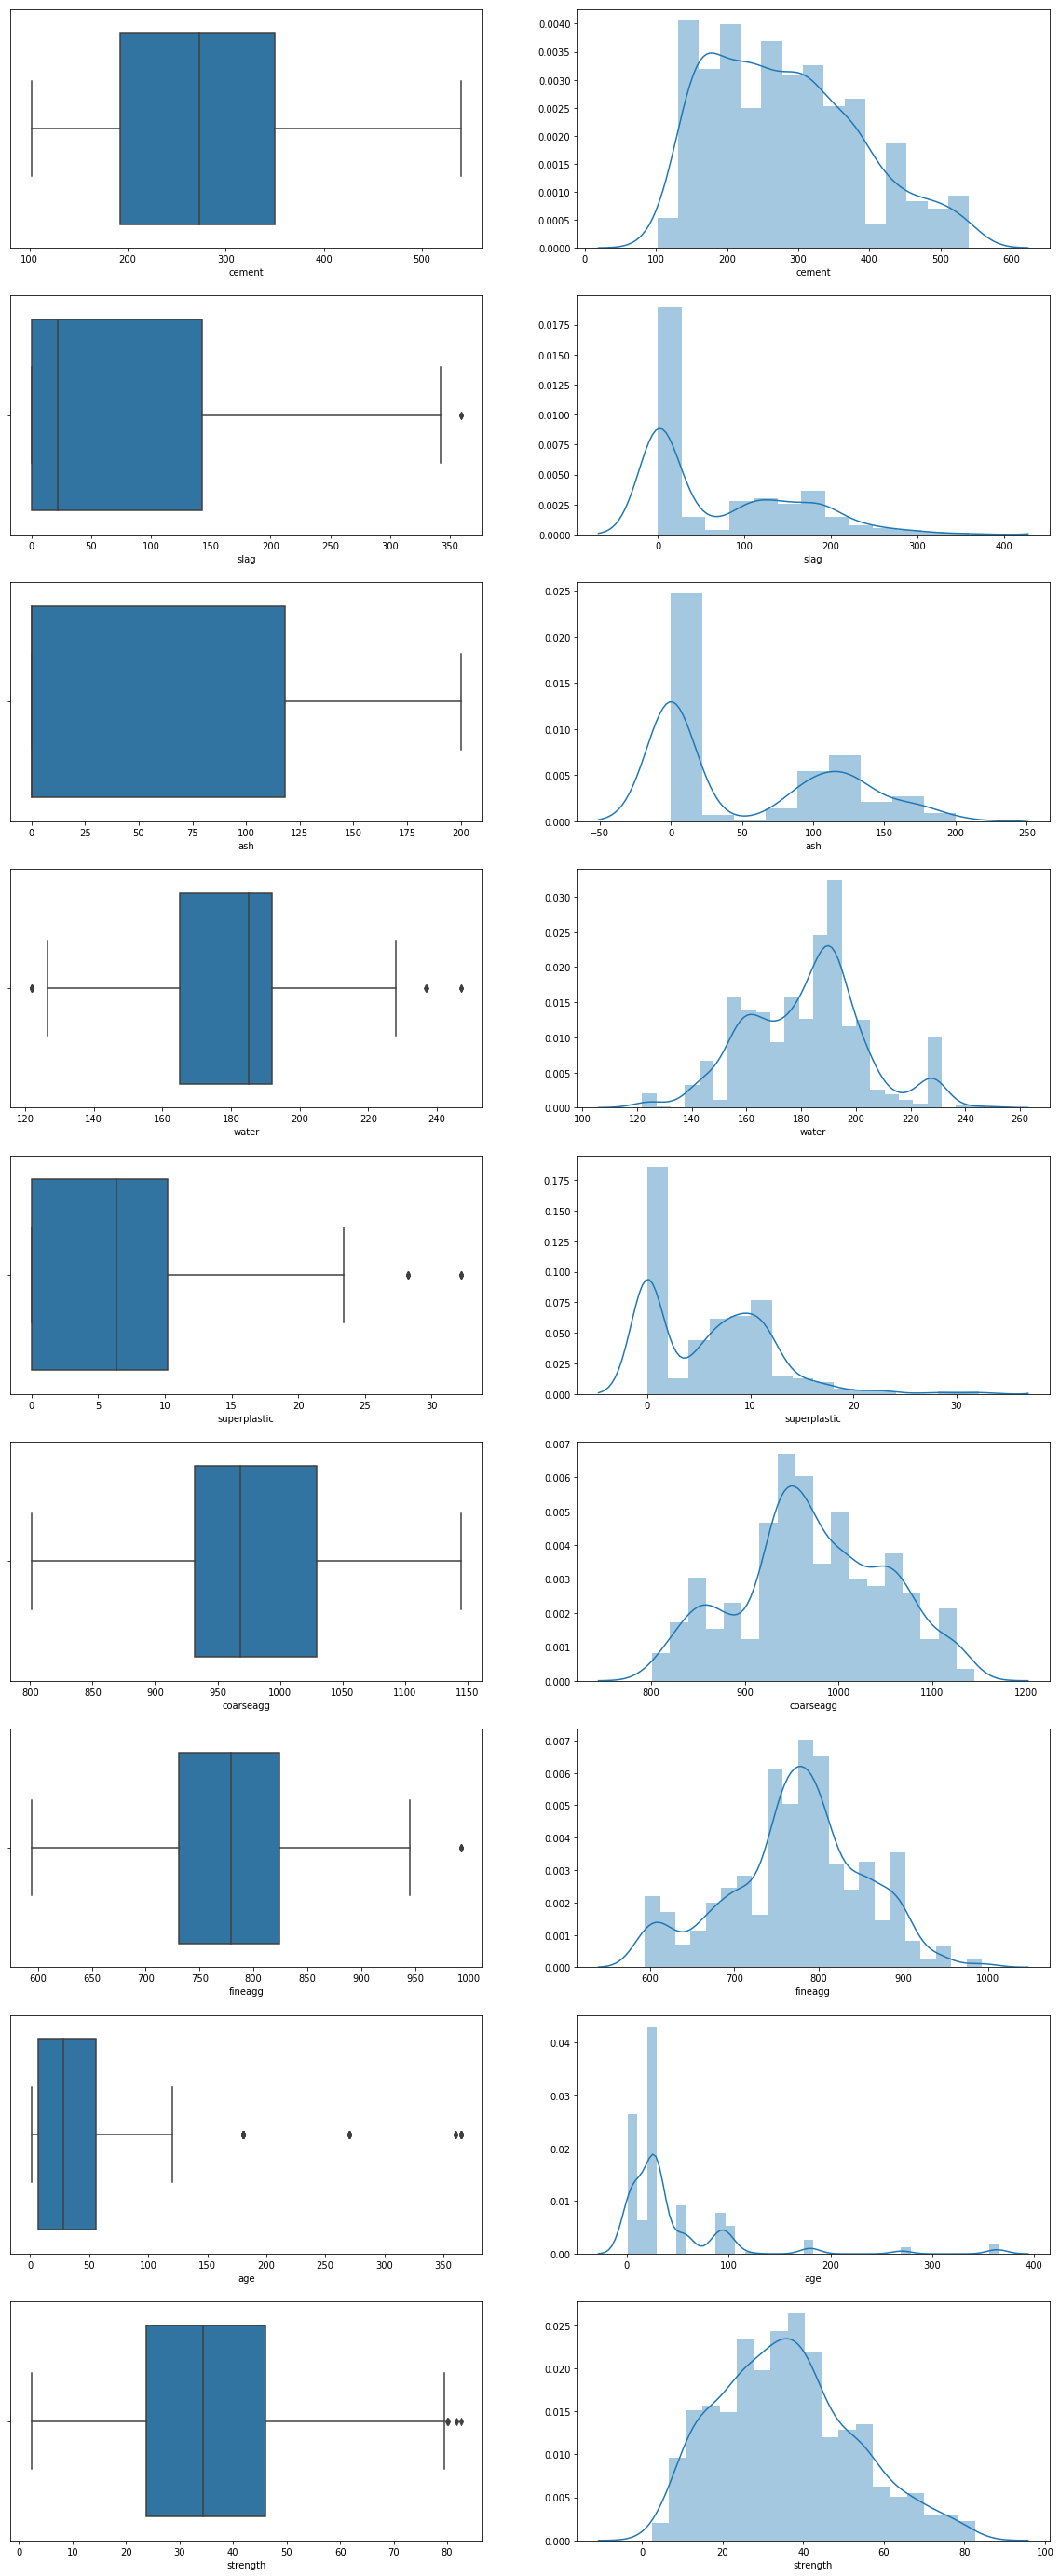

In [ ]:
f, axes = plt.subplots(9,2,figsize=(20,50), sharex=False)
sns.boxplot(concrete_df['cement'], ax=axes[0,0])
sns.distplot(concrete_df['cement'], ax=axes[0,1])

sns.boxplot(concrete_df['slag'], ax=axes[1,0])
sns.distplot(concrete_df['slag'], ax=axes[1,1])

sns.boxplot(concrete_df['ash'], ax=axes[2,0])
sns.distplot(concrete_df['ash'], ax=axes[2,1])

sns.boxplot(concrete_df['water'], ax=axes[3,0])
sns.distplot(concrete_df['water'], ax=axes[3,1])

sns.boxplot(concrete_df['superplastic'], ax=axes[4,0])
sns.distplot(concrete_df['superplastic'], ax=axes[4,1])

sns.boxplot(concrete_df['coarseagg'], ax=axes[5,0])
sns.distplot(concrete_df['coarseagg'], ax=axes[5,1])

sns.boxplot(concrete_df['fineagg'], ax=axes[6,0])
sns.distplot(concrete_df['fineagg'], ax=axes[6,1])

sns.boxplot(concrete_df['age'], ax=axes[7,0])
sns.distplot(concrete_df['age'], ax=axes[7,1])

sns.boxplot(concrete_df['strength'], ax=axes[8,0])
sns.distplot(concrete_df['strength'], ax=axes[8,1])
plt.show()

1. 'cement', 'ash', 'coarseagg', values don't have any outlier, the distribution is a bit skewed rightward.
2. 'slag' has one outlier visible, the distribution is skewed towards right. 
    It has significant numbe of near '0' values.
3. 'ash' has no outliers , the distribution is skewed towards right. 
    It has significant numbe of near '0' values.
4. 'water' has a few outliers on both sides. Its distribution is almost normal. 
5. 'superplastic' has a couple of outliers, the distribution is skewed towards right. 
    It has significant numbe of near '0' values.
6. 'coarseagg' has no outliers and distribution is close to normal.
7. 'fineagg' has one outlier visible, the distribution is a bit skewed leftward but quite close to normal.
8. 'age' has few outliers, the distribution is skewed towards right. It has significant numbe of near '0' values.
9. 'strength' has a few outliers and the distribution is a lttle bit skewed towards right but quite close to normal.


### 1. b. Multivariate analysis
        i. Bi-variate analysis between the predictor variables and between the predictor variables and
        target column. Comment on your findings in terms of their relationship and degree of relation
        if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, 
        histograms or density curves. Select the most appropriate attributes

##### pairplot

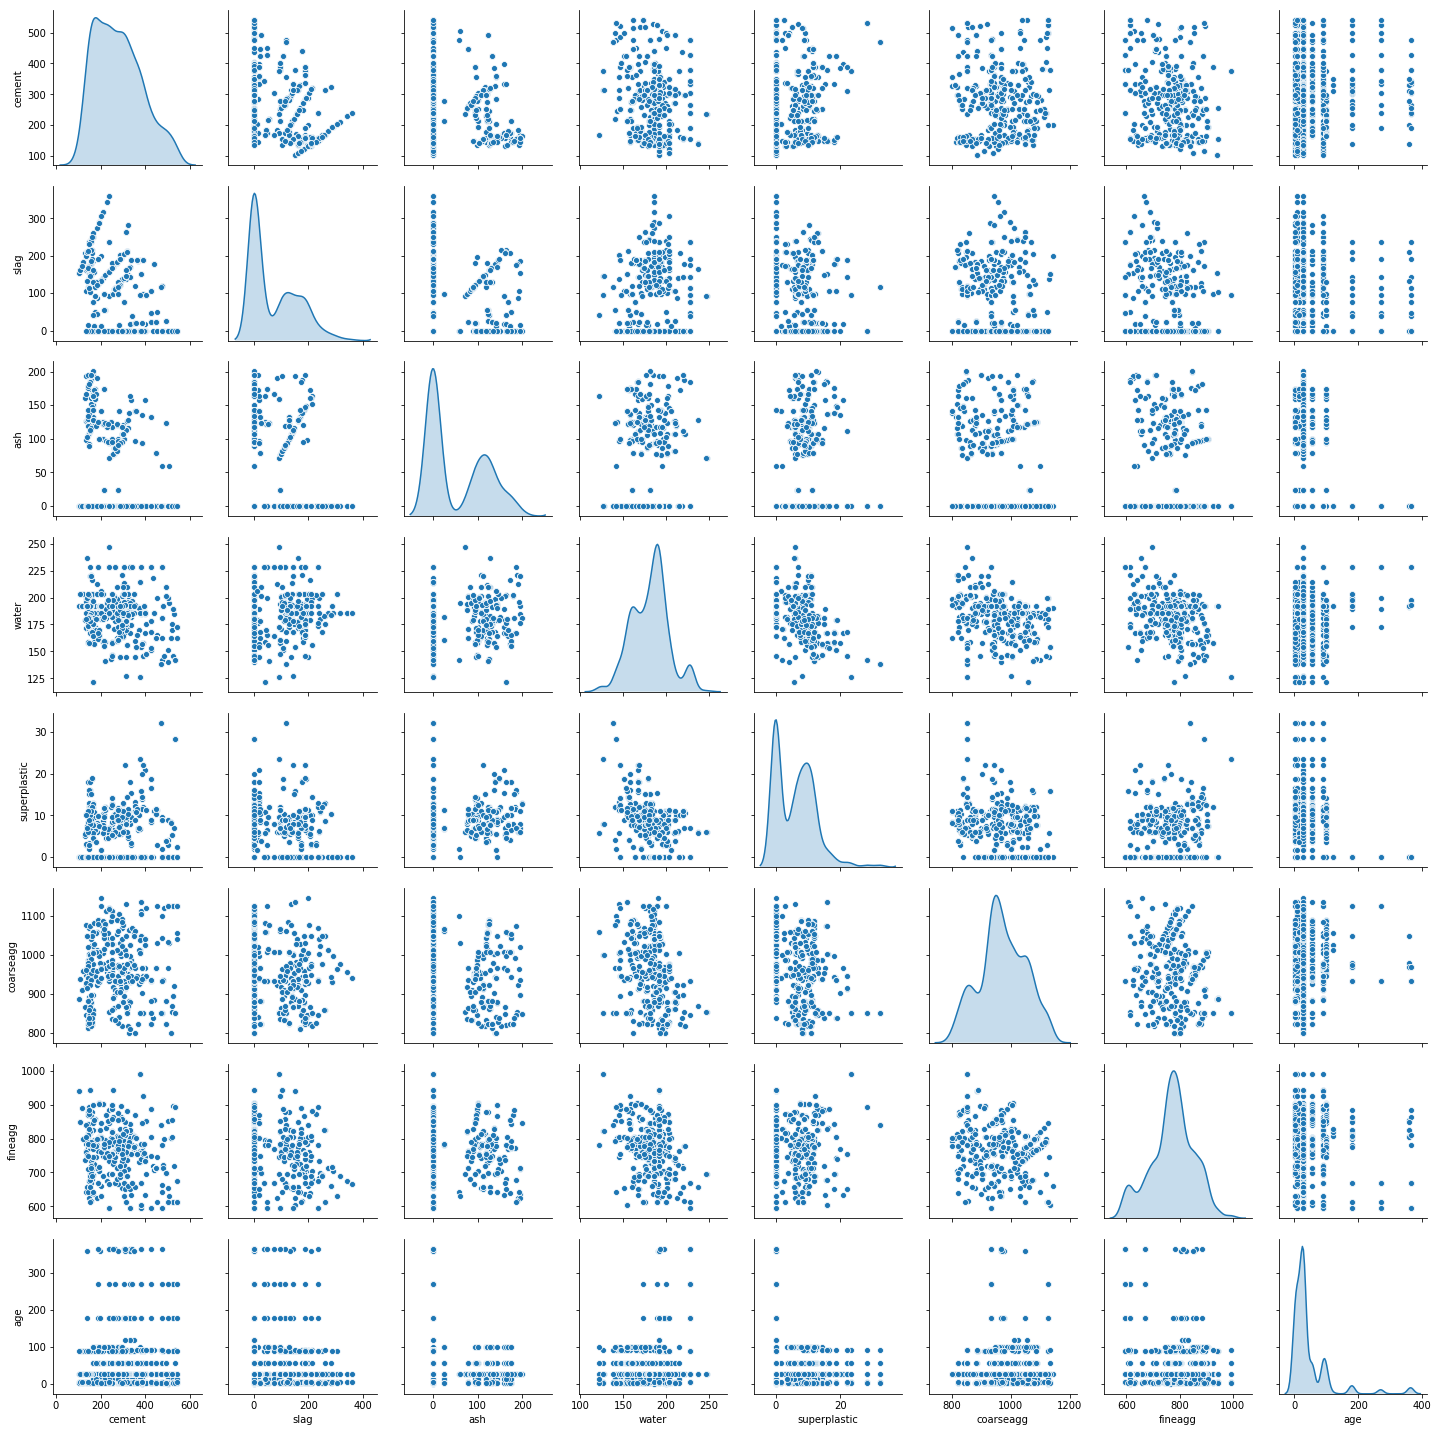

In [ ]:
X = concrete_df.drop(['strength'], axis=1)
y = concrete_df[['strength']]
sns.pairplot(X, diag_kind='kde')

#### Scatterplot

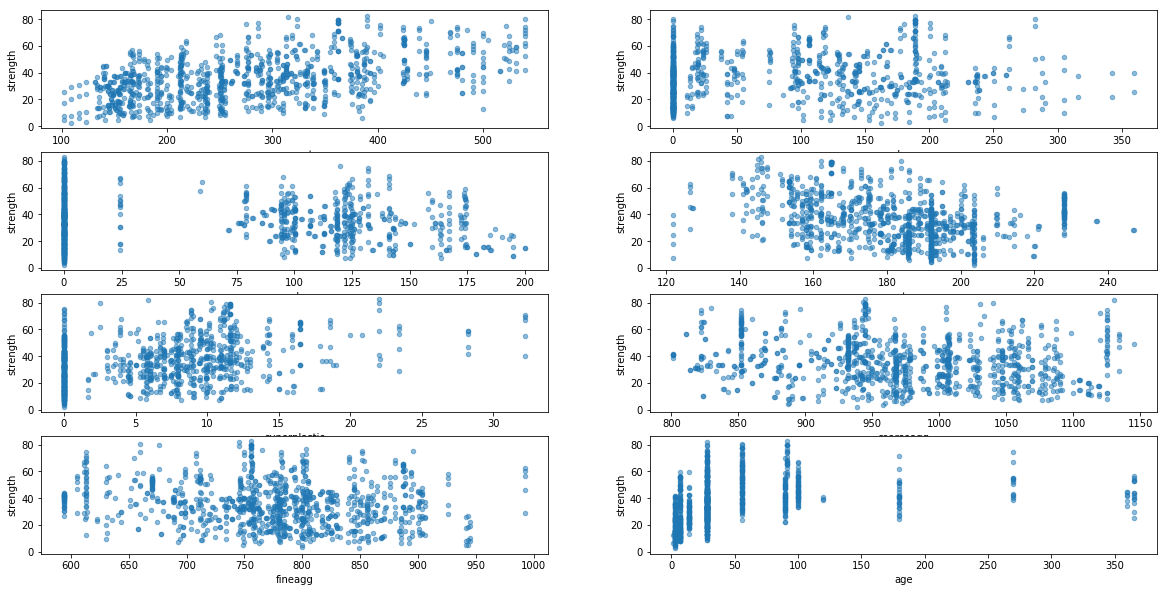

In [ ]:
f, axes = plt.subplots(4,2,figsize=(30,50), sharex=False)
concrete_df.plot.scatter(y='strength',x='cement',alpha=0.5,figsize=(20,10),s=20, ax=axes[0,0])
concrete_df.plot.scatter(y='strength',x='slag',alpha=0.5,figsize=(20,10),s=20, ax=axes[0,1])
concrete_df.plot.scatter(y='strength',x='ash',alpha=0.5,figsize=(20,10),s=20, ax=axes[1,0])
concrete_df.plot.scatter(y='strength',x='water',alpha=0.5,figsize=(20,10),s=20, ax=axes[1,1])
concrete_df.plot.scatter(y='strength',x='superplastic',alpha=0.5,figsize=(20,10),s=20, ax=axes[2,0])
concrete_df.plot.scatter(y='strength',x='coarseagg',alpha=0.5,figsize=(20,10),s=20, ax=axes[2,1])
concrete_df.plot.scatter(y='strength',x='fineagg',alpha=0.5,figsize=(20,10),s=20, ax=axes[3,0])
concrete_df.plot.scatter(y='strength',x='age',alpha=0.5,figsize=(20,10),s=20, ax=axes[3,1])

### 1. c. Addressing data pollution, outliers and missing values challenges

There are no missing values but few outliers.

# Deliverable 2. (Feature Engineering techniques)
    a. Identify opportunities(if any) to  create a composite feature, drop a feature.
    b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or 
    would a quadratic or higher degree help.
    c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters 
    and present your findings in terms of  the independent attributes and their suitability to predict
    strength.

In [ ]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
yScaled=y.apply(zscore)

### 2. a. Identify opportunities(if any) to  create a composite feature, drop a feature.

#### Covariance Matrix

In [ ]:
covMatrix = np.cov(XScaled, rowvar = False)
covMatrix

array([[ 1.00097182, -0.27548337, -0.39785361, -0.08166604,  0.09247596,
        -0.10945526, -0.22293429,  0.08202566],
       [-0.27548337,  1.00097182, -0.32389436,  0.10735626,  0.04331247,
        -0.28427461, -0.28187634, -0.04428902],
       [-0.39785361, -0.32389436,  1.00097182, -0.25723376,  0.37787001,
        -0.00997051,  0.07918537, -0.15452054],
       [-0.08166604,  0.10735626, -0.25723376,  1.00097182, -0.65817191,
        -0.18247076, -0.45109913,  0.27788802],
       [ 0.09247596,  0.04331247,  0.37787001, -0.65817191,  1.00097182,
        -0.26625765,  0.22290765, -0.1928873 ],
       [-0.10945526, -0.28427461, -0.00997051, -0.18247076, -0.26625765,
         1.00097182, -0.17865441, -0.00301881],
       [-0.22293429, -0.28187634,  0.07918537, -0.45109913,  0.22290765,
        -0.17865441,  1.00097182, -0.1562464 ],
       [ 0.08202566, -0.04428902, -0.15452054,  0.27788802, -0.1928873 ,
        -0.00301881, -0.1562464 ,  1.00097182]])

#### Eigen vectors

In [ ]:
pca = PCA(n_components = 8)
print(pca.fit(XScaled))
print("Eigen vectors: ",pca.explained_variance_)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
Eigen vectors:  [2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]


#### Eigen values and the percentage of variation explained by each eigen Vector

In [ ]:
print("Eigen values:\n", pca.components_)
print('\n',pca.explained_variance_ratio_)

Eigen values:
 [[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]
 [ 0.44616267  0.43738376  0.38188581  0.38874117  0.05174995  0.34931986
   0.43336994  0.01288097]]

 [0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021 0.00375535]


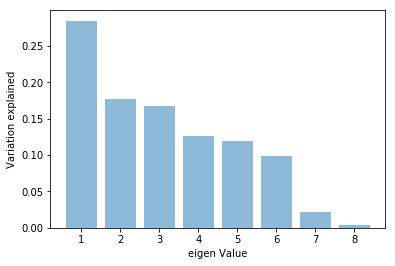

In [ ]:
plt.bar(list(range(1,9)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

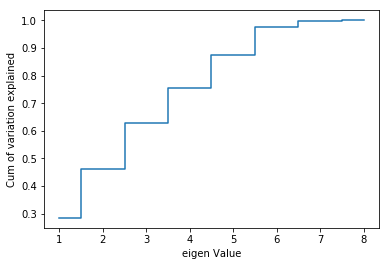

In [ ]:
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Dimensionality Reduction

Looking at above bar and step graphs, 7 dimensions seems very reasonable. With 7 variables we can explain over 95% of the variation in the original data!

In [ ]:
pca6 = PCA(n_components=7)
pca6.fit(XScaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)

[[ 0.09840137  0.17726197 -0.39466185  0.54700395 -0.50594541  0.03792808
  -0.40192597  0.29147949]
 [-0.11373709  0.6860529  -0.14294751  0.05325628  0.2829296  -0.62994342
  -0.01939111 -0.12598089]
 [ 0.81420224 -0.17179437 -0.40822055 -0.21318975  0.23459653 -0.17408781
  -0.00456921  0.10052137]
 [-0.054297   -0.36269932  0.2267512   0.29606003 -0.03727351 -0.54580513
   0.38528206  0.52791909]
 [ 0.14820612 -0.02093167  0.54963115  0.07022191  0.35461841 -0.03308317
  -0.70123743  0.22801019]
 [-0.20314214  0.30488197 -0.1832672  -0.36597033  0.19329372  0.31455942
   0.09246568  0.743908  ]
 [ 0.22184381  0.22836331  0.35246257 -0.52427468 -0.66464314 -0.22684015
  -0.03902583  0.06936667]]
[0.28501242 0.17700935 0.16750988 0.12676986 0.1189385  0.09877443
 0.02223021]


#### Splitting data into Training, Validation and Test sets
    * Validation dataset will be used for validation of feature engineering and model tuning.
    * Test dataset will not be used until  final model is created.

In [ ]:
# For splitting data in train and test sets
from sklearn.model_selection import train_test_split
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    XScaled, yScaled, test_size=0.3, random_state=1)

X_train, X_validation, y_train, y_validation = train_test_split(
    X_train_validation, y_train_validation, test_size=0.3, random_state=2)

print(' Training dataset shape:\n', X_train.shape)
print('\n Validation dataset shape:\n', X_validation.shape)
print('\n Sest dataset shape:\n', X_test.shape)

 Training dataset shape:
 (504, 8)

 Validation dataset shape:
 (217, 8)

 Sest dataset shape:
 (309, 8)


In [ ]:
X_train = pca6.transform(X_train)
print(X_train.shape)

pca6_validation = PCA(n_components=6)
pca6_validation.fit(XScaled)
X_validation = pca6.transform(X_validation)
print(X_validation.shape)

pca6_test = PCA(n_components=6)
pca6_test.fit(XScaled)
X_test = pca6.transform(X_test)
print(X_test.shape)

(504, 7)
(217, 7)
(309, 7)


#### Models to consider
    Linear Regression
    Polinomial
    Logistic Regression
    Decision Tree Regression
    SVM Regression
    Random Forest Regression
    AdaBoost Regression
    XGBoost Regression
    kNN Regressor

#### Linear Regression

In [ ]:
linReg_model = LinearRegression()
linReg_model.fit(X_train, y_train)
print('Training score: ', linReg_model.score(X_train, y_train))
print('Validation score: ', linReg_model.score(X_validation, y_validation))

Training score:  0.5731872498320234
Validation score:  0.5972423450517237


#### Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly = poly.fit_transform(X_train)
linReg_model.fit(X_validation, y_validation)
print(linReg_model.coef_[0])
print('Training score: ', linReg_model.score(X_train, y_train))
print('Validation score: ',linReg_model.score(X_validation, y_validation))

[0.0019813  0.15695967 0.48362278 0.04809572 0.30041709 0.41961202
 0.57888502]
Training score:  0.5425492419618488
Validation score:  0.6270066348755092


### 2. b. Decide on complexity of the model
    should it be simple linear mode in terms of parameters or would a quadratic or higher degree help?

#### Decision Tree Regression

In [ ]:
# For Decision Tree Regression model building
from sklearn.tree import DecisionTreeRegressor

dTreeReg = DecisionTreeRegressor(max_depth=6)
dTreeReg.fit(X_train, y_train)
print('Training score: ', dTreeReg.score(X_train, y_train))
print('Validation score: ', dTreeReg.score(X_validation, y_validation))

Training score:  0.8377716714043856
Validation score:  0.565642228622983


#### SVM Regression

In [ ]:
# for Support Vector Regression model building
from sklearn.svm import SVR

svmReg = SVR(kernel='rbf')
svmReg.fit(X_train, np.array(y_train).ravel())
print('Training score: ', svmReg.score(X_train, y_train))
print('Validation score: ', svmReg.score(X_validation, y_validation))

Training score:  0.8640173876304307
Validation score:  0.8160712632008276


#### Random Forest Regression

In [ ]:
# For Random Forest model building
from sklearn.ensemble import RandomForestRegressor

rfReg = RandomForestRegressor()
rfReg.fit(X_train, np.array(y_train).ravel())
print('Training score: ', rfReg.score(X_train, y_train))
print('Validation score: ', rfReg.score(X_validation, y_validation))

Training score:  0.9616262008393185
Validation score:  0.7888673788349743


#### AdaBoosting Regressor

In [ ]:
# For AdaBoosting model building
from sklearn.ensemble import AdaBoostRegressor

abReg_model = AdaBoostRegressor()
abReg_model.fit(X_train, np.array(y_train).ravel())
print('Training score: ', abReg_model.score(X_train, y_train))
print('Validation score: ', abReg_model.score(X_validation, y_validation))

Training score:  0.7245866350708917
Validation score:  0.6509375699182467


#### kNN regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knnReg_model = KNeighborsRegressor(n_neighbors= 6 , weights = 'distance')
knnReg_model.fit(X_train, np.array(y_train).ravel())
print('Training score: ', knnReg_model.score(X_train, y_train))
print('Validation score: ', knnReg_model.score(X_validation, y_validation))

Training score:  0.9950468555217494
Validation score:  0.7189947358309091


### 2. c. Explore for gaussians. 
    If data is likely to be a mix of gaussians, explore individual clusters and present your findings
    in terms of  the independent attributes and their suitability to predict strength.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a284f7cf8>,
      dtype=object)

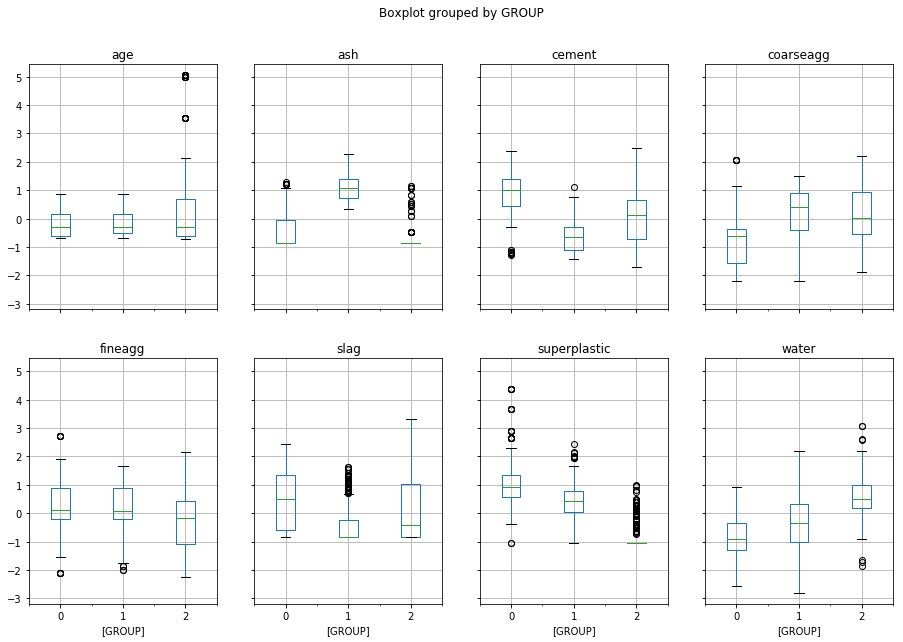

In [ ]:
from sklearn.cluster import KMeans

cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(XScaled)

prediction = cluster.predict(XScaled)
XScaled["GROUP"] = prediction

centroids = cluster.cluster_centers_

centroid_df = pd.DataFrame(centroids, columns = list(XScaled-1) )

import matplotlib.pylab as plt
XScaled.boxplot(by ='GROUP',  layout=(2,4), figsize=(15, 10))

# Deliverable 3. (create the model )
    a. Obtain feature importance for the individual features using multiple methods and present your
    findings.

* Looking at the scores of all above regressors, we can see that SVM is performing very well on validation dataset.
    So SVM seems to be our model for predicting compressive strength of concrete for now.

In [ ]:
print('Here is our model:\n\n', svmReg)

Here is our model:

 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# Deliverable 4. (Tuning the model)
    a. Algorithms that you think will be suitable for this project.
    b. Techniques employed to squeeze that extra performance out of the model without making it overfit
    or underfit
    c. Model performance range at 95% confidence level.

### 4. a. Algorithms that you think will be suitable for this project.

In [ ]:
print('Here is our model:\n\n', svmReg)

Here is our model:

 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


Now lets test this SVR model

In [ ]:
print('Test score: ', rfReg.score(X_test, y_test))

Test score:  0.77014400290647


The test score is not as good as it is for validation score but it is still pretty good.

### 4. b. Techniques to squeeze that extra performance out of the model w/t making it overfit or underfit

Lets try KFold and see the accuracy of this model

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_fold = 50
kfold = KFold(n_splits = num_fold, random_state = 3)
model = svmReg = SVR(kernel='rbf')
results = cross_val_score(model, XScaled, np.array(yScaled).ravel(), cv = kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.074% (8.569%)


### 4. c. Model performance range at 95% confidence level.

Lets create a method for resampling which we can use with various regression models.

In [ ]:
from sklearn.utils import resample

def resampling(regression_model):
    values = concrete_df.values
    n_iterations = 10
    stats = list()

    for i in range(n_iterations):
        train = resample(values)
        test = np.array([x for x in values if x.tolist() not in train.tolist()]) 
    
        # fit model
        model = regression_model
        model.fit(train[:,:-1], train[:,-1])
    
        # evaluate model
        results = cross_val_score(model, XScaled, np.array(yScaled).ravel(), cv = kfold)
        stats.append(results)
        
    # plot scores
    plt.hist(stats)
    plt.show()

    # confidence intervals
    alpha = 0.95
    p = ((1.0-alpha)/2.0) * 100 
    lower = max(0.0, np.percentile(stats, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(stats, p))
    print('%.2f confidence interval %.2f%% and %.2f%%' % (alpha*100, lower*100, upper*100))

Lets fit our SVR using resample.

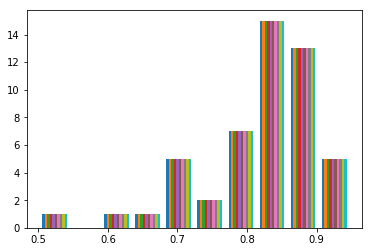

95.00 confidence interval 61.50% and 92.80%


In [ ]:
resampling(SVR(kernel='rbf'))

Now lets fit the 2nd best model, Random Forest Regression, using resample. And it may just get better result.

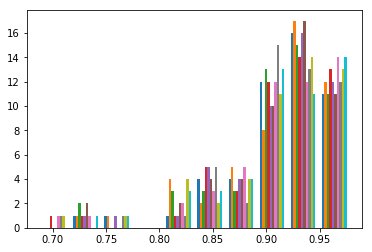

95.00 confidence interval 74.42% and 97.44%


In [ ]:
resampling(RandomForestRegressor())

Well, it turns out Random Forest Regression is performing much better than SVR with resample.
Why don't we try the other regression models with Resample as well and see how they perform.

Linear Regression model using Resample:

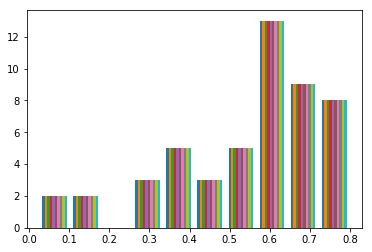

95.00 confidence interval 9.84% and 78.60%


In [ ]:
resampling(LinearRegression())

Desion Tree Regressor using Resample:

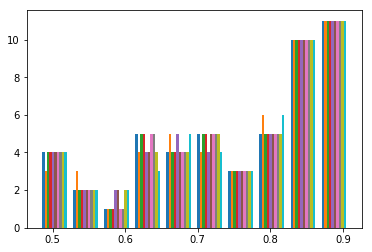

95.00 confidence interval 48.65% and 89.59%


In [ ]:
resampling(DecisionTreeRegressor(max_depth=6))

Adaptive Boosting with Resample:

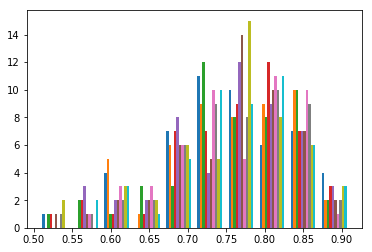

95.00 confidence interval 57.21% and 88.23%


In [ ]:
resampling(AdaBoostRegressor())

kNN regressor with using resample:

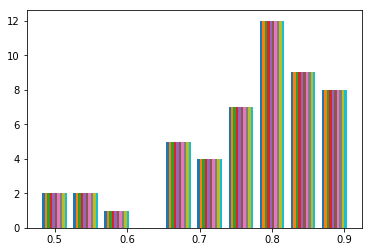

95.00 confidence interval 51.53% and 89.56%


In [ ]:
resampling(KNeighborsRegressor(n_neighbors= 6 , weights = 'distance'))

# Conclusion:

1. As per validation scores from various regression models, it seemed SVR is the best model.
   However when we trained this models using sampling, Random Forest Regression performed much better.
    
2. Almos all histographs of various regression models using resampling show skewed leftward. 
    It is probably due to few set of data from sampling have significant number . of outliers.